In [13]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report

import networkx as nx
from itertools import combinations


In [14]:
data = r"./batch4/dataset4.csv"

df = pd.read_csv(data)
print(df.head())

                                                link  \
0  https://foodbabe.com/fda-banning-artificial-dy...   
1  https://foodbabe.com/my-visit-to-the-white-hou...   
2  https://foodbabe.com/wk-kelloggs-ceo-gary-piln...   
3  https://foodbabe.com/general-mills-has-been-pu...   
4  https://foodbabe.com/food-policy-expert-asks-k...   

                                               title  annotation  \
0  FDA banning artificial dyes from our food. Wat...           0   
1  My Visit To The White House – Exposing Big Foo...           0   
2  WK Kellogg’s CEO Gary Pilnick breaks his silen...           0   
3  General Mills has been put on notice: Remove d...           0   
4  Food Policy Expert asks Kellogg’s CEO: “Would ...           0   

                                             content  
0  I just had the most impactful day in my entire...  
1  Someone needs to pinch me, because I almost ca...  
2  WK Kellogg’s CEO Gary Pilnick finally breaks h...  
3  Our movement is growing bigger 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\agaro\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


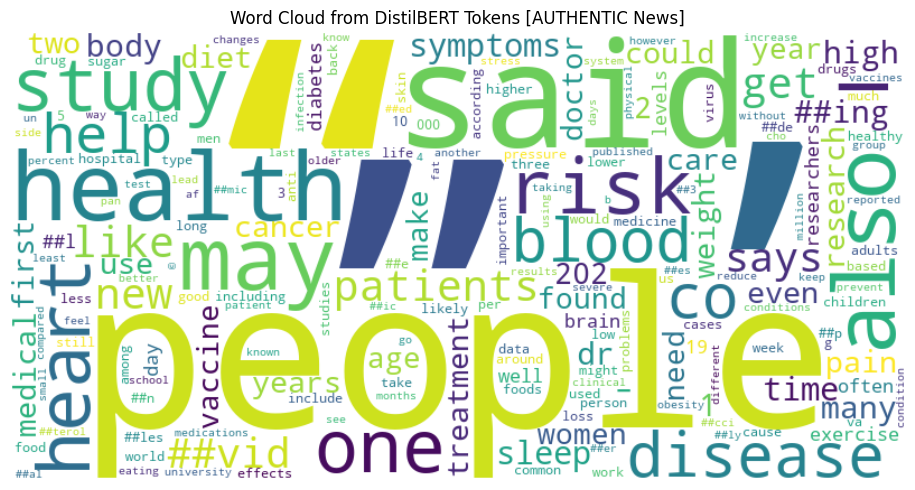

C:\Users\agaro\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


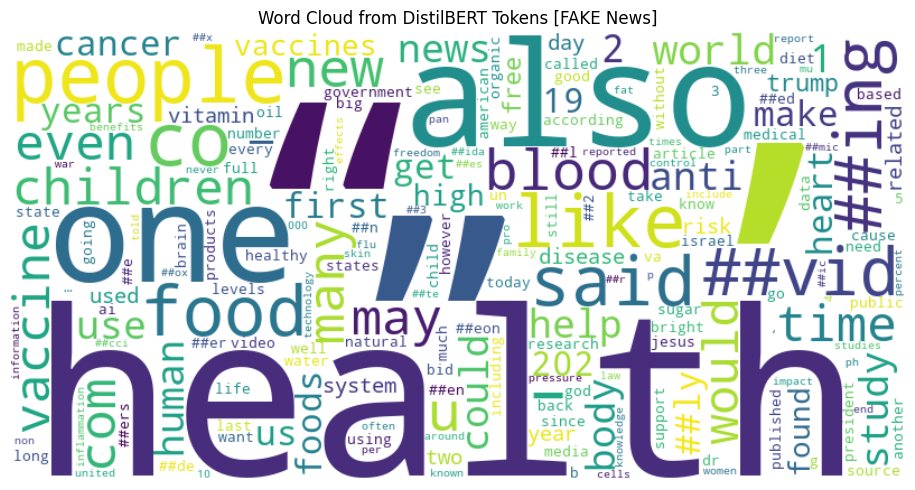

In [18]:
# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Function to filter tokens
def filter_tokens(token_list):
    return [
        token for token in token_list
        if token not in string.punctuation  # remove punctuations like '.' or ','
        and token.lower().strip('#') not in stop_words  # remove stopwords even from subwords
        and not token.startswith("##.")  # avoid strange sub-punctuations
    ]

# Separate data
authentic_texts = df[df['annotation'] == 1]['content'].tolist()
fake_texts = df[df['annotation'] == 0]['content'].tolist()

# Tokenize and filter tokens
authentic_tokens = []
for text in authentic_texts:
    tokens = tokenizer.tokenize(text)
    filtered = filter_tokens(tokens)
    authentic_tokens.extend(filtered)

fake_tokens = []
for text in fake_texts:
    tokens = tokenizer.tokenize(text)
    filtered = filter_tokens(tokens)
    fake_tokens.extend(filtered)

# Count frequencies
authentic_freq = Counter(authentic_tokens)
fake_freq = Counter(fake_tokens)

# Generate WordClouds
def show_wordcloud(freq_dist, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()

show_wordcloud(authentic_freq, "Word Cloud from DistilBERT Tokens [AUTHENTIC News]")
show_wordcloud(fake_freq, "Word Cloud from DistilBERT Tokens [FAKE News]")